In [5]:
import pandas as pd
import pyarrow
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt 
import seaborn as sns 
import yfinance as yf 
import yahoo_fin.stock_info as si 
from bs4 import BeautifulSoup 
from yahoo_fin.stock_info import get_analysts_info
import mplfinance as mpf
import requests
import json

# Get earnings history

In [25]:

url = 'https://www.alphavantage.co/query?function=EARNINGS&symbol=AAPL&apikey=N9VFU80S37LZPISJ'
r = requests.get(url)
data = r.json()

print(data)

{'symbol': 'AAPL', 'annualEarnings': [{'fiscalDateEnding': '2023-12-31', 'reportedEPS': '2.02'}, {'fiscalDateEnding': '2023-09-30', 'reportedEPS': '6.12'}, {'fiscalDateEnding': '2022-09-30', 'reportedEPS': '6.11'}, {'fiscalDateEnding': '2021-09-30', 'reportedEPS': '5.62'}, {'fiscalDateEnding': '2020-09-30', 'reportedEPS': '3.27'}, {'fiscalDateEnding': '2019-09-30', 'reportedEPS': '2.98'}, {'fiscalDateEnding': '2018-09-30', 'reportedEPS': '2.97'}, {'fiscalDateEnding': '2017-09-30', 'reportedEPS': '2.3'}, {'fiscalDateEnding': '2016-09-30', 'reportedEPS': '2.0675'}, {'fiscalDateEnding': '2015-09-30', 'reportedEPS': '2.3'}, {'fiscalDateEnding': '2014-09-30', 'reportedEPS': '1.6075'}, {'fiscalDateEnding': '2013-09-30', 'reportedEPS': '1.415'}, {'fiscalDateEnding': '2012-09-30', 'reportedEPS': '1.5775'}, {'fiscalDateEnding': '2011-09-30', 'reportedEPS': '0.9875'}, {'fiscalDateEnding': '2010-09-30', 'reportedEPS': '0.54'}, {'fiscalDateEnding': '2009-09-30', 'reportedEPS': '0.2225'}, {'fiscalD

In [26]:
data.pop("annualEarnings")

[{'fiscalDateEnding': '2023-12-31', 'reportedEPS': '2.02'},
 {'fiscalDateEnding': '2023-09-30', 'reportedEPS': '6.12'},
 {'fiscalDateEnding': '2022-09-30', 'reportedEPS': '6.11'},
 {'fiscalDateEnding': '2021-09-30', 'reportedEPS': '5.62'},
 {'fiscalDateEnding': '2020-09-30', 'reportedEPS': '3.27'},
 {'fiscalDateEnding': '2019-09-30', 'reportedEPS': '2.98'},
 {'fiscalDateEnding': '2018-09-30', 'reportedEPS': '2.97'},
 {'fiscalDateEnding': '2017-09-30', 'reportedEPS': '2.3'},
 {'fiscalDateEnding': '2016-09-30', 'reportedEPS': '2.0675'},
 {'fiscalDateEnding': '2015-09-30', 'reportedEPS': '2.3'},
 {'fiscalDateEnding': '2014-09-30', 'reportedEPS': '1.6075'},
 {'fiscalDateEnding': '2013-09-30', 'reportedEPS': '1.415'},
 {'fiscalDateEnding': '2012-09-30', 'reportedEPS': '1.5775'},
 {'fiscalDateEnding': '2011-09-30', 'reportedEPS': '0.9875'},
 {'fiscalDateEnding': '2010-09-30', 'reportedEPS': '0.54'},
 {'fiscalDateEnding': '2009-09-30', 'reportedEPS': '0.2225'},
 {'fiscalDateEnding': '2008-09-

In [28]:
df = pd.json_normalize(data, record_path='quarterlyEarnings')
print(df)

    fiscalDateEnding reportedDate reportedEPS estimatedEPS surprise  \
0         2023-12-31   2024-02-01        2.02         1.93     0.09   
1         2023-09-30   2023-11-02        1.46         1.39     0.07   
2         2023-06-30   2023-08-03        1.26         1.19     0.07   
3         2023-03-31   2023-05-04        1.52         1.43     0.09   
4         2022-12-31   2023-02-02        1.88         1.94    -0.06   
..               ...          ...         ...          ...      ...   
107       1997-03-31   1997-04-16       -0.05        -0.04    -0.01   
108       1996-12-31   1997-01-15       -0.03        -0.02    -0.01   
109       1996-09-30   1996-10-16      0.0018        -0.01   0.0118   
110       1996-06-30   1996-07-17       -0.02        -0.04     0.02   
111       1996-03-31   1996-04-17       -0.07        -0.05    -0.02   

    surprisePercentage  
0               4.6632  
1                5.036  
2               5.8824  
3               6.2937  
4              -3.0928

In [29]:
del df["fiscalDateEnding"]
print(df)

    reportedDate reportedEPS estimatedEPS surprise surprisePercentage
0     2024-02-01        2.02         1.93     0.09             4.6632
1     2023-11-02        1.46         1.39     0.07              5.036
2     2023-08-03        1.26         1.19     0.07             5.8824
3     2023-05-04        1.52         1.43     0.09             6.2937
4     2023-02-02        1.88         1.94    -0.06            -3.0928
..           ...         ...          ...      ...                ...
107   1997-04-16       -0.05        -0.04    -0.01                -25
108   1997-01-15       -0.03        -0.02    -0.01                -50
109   1996-10-16      0.0018        -0.01   0.0118                118
110   1996-07-17       -0.02        -0.04     0.02                 50
111   1996-04-17       -0.07        -0.05    -0.02                -40

[112 rows x 5 columns]


In [31]:
df.to_csv("earnings.csv", index=False)


In [2]:
df = pd.read_csv('earnings.csv', index_col='reportedDate', parse_dates=True)
df

,reportedEPS,estimatedEPS,surprise,surprisePercentage
reportedDate,,,,
2024-02-01,2.0200,1.93,0.0900,4.6632
2023-11-02,1.4600,1.39,0.0700,5.0360
2023-08-03,1.2600,1.19,0.0700,5.8824
2023-05-04,1.5200,1.43,0.0900,6.2937
2023-02-02,1.8800,1.94,-0.0600,-3.0928
...,...,...,...,...
1997-04-16,-0.0500,-0.04,-0.0100,-25.0000
1997-01-15,-0.0300,-0.02,-0.0100,-50.0000
1996-10-16,0.0018,-0.01,0.0118,118.0000


In [6]:

df['reportedEPS'] = df['reportedEPS'].astype('float16')
df['estimatedEPS'] = df['estimatedEPS'].astype('float16')
df['surprise'] = df['surprise'].astype('float16')
df['surprisePercentage'] = df['surprisePercentage'].astype('float16')

In [8]:
df_report = df[['estimatedEPS', 'reportedEPS']]

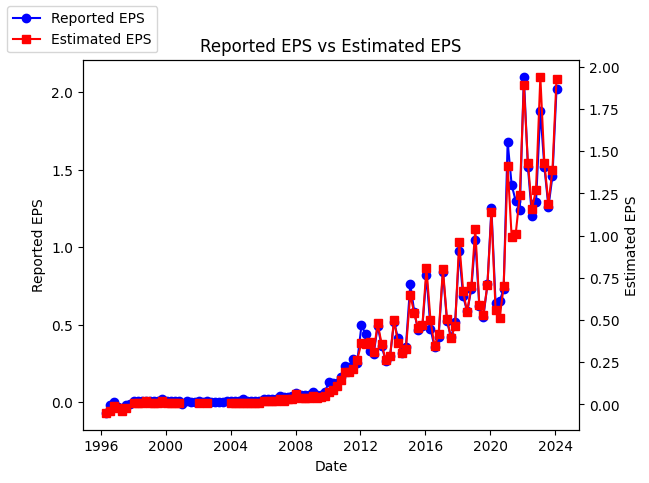

In [9]:
# Plotting
fig, ax1 = plt.subplots()

# Plot reportedEPS
ax1.plot(df_report.index, df_report['reportedEPS'], color='b', marker='o', label='Reported EPS')
ax1.set_xlabel('Date')
ax1.set_ylabel('Reported EPS')
ax1.tick_params(axis='y')

# Create a twin Axes sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(df_report.index, df_report['estimatedEPS'], color='r', marker='s', label='Estimated EPS')
ax2.set_ylabel('Estimated EPS')
ax2.tick_params(axis='y')

fig.legend(loc='upper left')

plt.title('Reported EPS vs Estimated EPS');

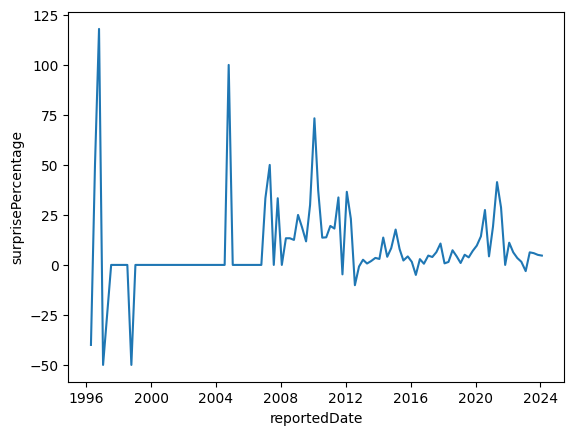

In [10]:
sns.lineplot(data=df['surprisePercentage']);

# Get stock price history

In [57]:

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=full&apikey=N9VFU80S37LZPISJ'
sp = requests.get(url)
data = sp.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2024-02-05', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2024-02-05': {'1. open': '188.1500', '2. high': '189.2500', '3. low': '185.8400', '4. close': '187.6800', '5. volume': '69668820'}, '2024-02-02': {'1. open': '179.8600', '2. high': '187.3300', '3. low': '179.2500', '4. close': '185.8500', '5. volume': '102551680'}, '2024-02-01': {'1. open': '183.9850', '2. high': '186.9500', '3. low': '183.8200', '4. close': '186.8600', '5. volume': '64885408'}, '2024-01-31': {'1. open': '187.0400', '2. high': '187.0950', '3. low': '184.3500', '4. close': '184.4000', '5. volume': '55467803'}, '2024-01-30': {'1. open': '190.9400', '2. high': '191.8000', '3. low': '187.4700', '4. close': '188.0400', '5. volume': '55859370'}, '2024-01-29': {'1. open': '192.0100', '2. high': '192.2000', '3. low': '189.5800', '4. close': '191.7300',

In [58]:
del data['Meta Data']
data

{'Time Series (Daily)': {'2024-02-05': {'1. open': '188.1500',
   '2. high': '189.2500',
   '3. low': '185.8400',
   '4. close': '187.6800',
   '5. volume': '69668820'},
  '2024-02-02': {'1. open': '179.8600',
   '2. high': '187.3300',
   '3. low': '179.2500',
   '4. close': '185.8500',
   '5. volume': '102551680'},
  '2024-02-01': {'1. open': '183.9850',
   '2. high': '186.9500',
   '3. low': '183.8200',
   '4. close': '186.8600',
   '5. volume': '64885408'},
  '2024-01-31': {'1. open': '187.0400',
   '2. high': '187.0950',
   '3. low': '184.3500',
   '4. close': '184.4000',
   '5. volume': '55467803'},
  '2024-01-30': {'1. open': '190.9400',
   '2. high': '191.8000',
   '3. low': '187.4700',
   '4. close': '188.0400',
   '5. volume': '55859370'},
  '2024-01-29': {'1. open': '192.0100',
   '2. high': '192.2000',
   '3. low': '189.5800',
   '4. close': '191.7300',
   '5. volume': '47145622'},
  '2024-01-26': {'1. open': '194.2700',
   '2. high': '194.7600',
   '3. low': '191.9400',
   

In [59]:
stock_price = json.dumps(data)
with open("data.json","w") as stock_price:
    json.dump(data, stock_price)

In [60]:
with open("data.json", "r") as stock_price:
    sp_data = json.load(stock_price)
print(sp_data)
print(type(sp_data))

{'Time Series (Daily)': {'2024-02-05': {'1. open': '188.1500', '2. high': '189.2500', '3. low': '185.8400', '4. close': '187.6800', '5. volume': '69668820'}, '2024-02-02': {'1. open': '179.8600', '2. high': '187.3300', '3. low': '179.2500', '4. close': '185.8500', '5. volume': '102551680'}, '2024-02-01': {'1. open': '183.9850', '2. high': '186.9500', '3. low': '183.8200', '4. close': '186.8600', '5. volume': '64885408'}, '2024-01-31': {'1. open': '187.0400', '2. high': '187.0950', '3. low': '184.3500', '4. close': '184.4000', '5. volume': '55467803'}, '2024-01-30': {'1. open': '190.9400', '2. high': '191.8000', '3. low': '187.4700', '4. close': '188.0400', '5. volume': '55859370'}, '2024-01-29': {'1. open': '192.0100', '2. high': '192.2000', '3. low': '189.5800', '4. close': '191.7300', '5. volume': '47145622'}, '2024-01-26': {'1. open': '194.2700', '2. high': '194.7600', '3. low': '191.9400', '4. close': '192.4200', '5. volume': '44594011'}, '2024-01-25': {'1. open': '195.2200', '2. h

In [61]:
sp_data = pd.DataFrame(sp_data)
sp_data

,Time Series (Daily)
2024-02-05,"{'1. open': '188.1500', '2. high': '189.2500',..."
2024-02-02,"{'1. open': '179.8600', '2. high': '187.3300',..."
2024-02-01,"{'1. open': '183.9850', '2. high': '186.9500',..."
2024-01-31,"{'1. open': '187.0400', '2. high': '187.0950',..."
2024-01-30,"{'1. open': '190.9400', '2. high': '191.8000',..."
...,...
1999-11-05,"{'1. open': '84.6200', '2. high': '88.3700', '..."
1999-11-04,"{'1. open': '82.0600', '2. high': '85.3700', '..."
1999-11-03,"{'1. open': '81.6200', '2. high': '83.2500', '..."
1999-11-02,"{'1. open': '78.0000', '2. high': '81.6900', '..."


In [62]:
sp_data = pd.DataFrame(sp_data)

In [63]:
#Put dict keys in column headers
for key, value in sp_data['Time Series (Daily)'][0].items():
    sp_data[f'data_{key.replace(".", "_")}'] = value

C:\Users\Scott\AppData\Local\Temp\ipykernel_17356\2876511852.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for key, value in sp_data['Time Series (Daily)'][0].items():


In [64]:
# Drop the original column with dictionaries if needed
sp_data = sp_data.drop('Time Series (Daily)', axis=1)

In [65]:
print(sp_data)

           data_1_ open data_2_ high data_3_ low data_4_ close data_5_ volume
2024-02-05     188.1500     189.2500    185.8400      187.6800       69668820
2024-02-02     188.1500     189.2500    185.8400      187.6800       69668820
2024-02-01     188.1500     189.2500    185.8400      187.6800       69668820
2024-01-31     188.1500     189.2500    185.8400      187.6800       69668820
2024-01-30     188.1500     189.2500    185.8400      187.6800       69668820
...                 ...          ...         ...           ...            ...
1999-11-05     188.1500     189.2500    185.8400      187.6800       69668820
1999-11-04     188.1500     189.2500    185.8400      187.6800       69668820
1999-11-03     188.1500     189.2500    185.8400      187.6800       69668820
1999-11-02     188.1500     189.2500    185.8400      187.6800       69668820
1999-11-01     188.1500     189.2500    185.8400      187.6800       69668820

[6104 rows x 5 columns]


In [66]:
#rename columns
sp_data.rename({'data_1_ open': 'open', 'data_2_ high': 'high', 'data_3_ low': 'low', 'data_4_ close': 'close', 'data_5_ volume': 'volume'}, axis=1, inplace=True)


In [67]:
sp_data

,open,high,low,close,volume
2024-02-05,188.1500,189.2500,185.8400,187.6800,69668820
2024-02-02,188.1500,189.2500,185.8400,187.6800,69668820
2024-02-01,188.1500,189.2500,185.8400,187.6800,69668820
2024-01-31,188.1500,189.2500,185.8400,187.6800,69668820
2024-01-30,188.1500,189.2500,185.8400,187.6800,69668820
...,...,...,...,...,...
1999-11-05,188.1500,189.2500,185.8400,187.6800,69668820
1999-11-04,188.1500,189.2500,185.8400,187.6800,69668820
1999-11-03,188.1500,189.2500,185.8400,187.6800,69668820
1999-11-02,188.1500,189.2500,185.8400,187.6800,69668820


In [68]:
sp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6104 entries, 2024-02-05 to 1999-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   open    6104 non-null   object
 1   high    6104 non-null   object
 2   low     6104 non-null   object
 3   close   6104 non-null   object
 4   volume  6104 non-null   object
dtypes: object(5)
memory usage: 286.1+ KB


In [69]:
sp_data.to_csv("AAPL_price.csv", index=False)

In [72]:
sp_data = pd.read_csv('Data/AAPL_price.csv')

In [73]:
sp_data

,Date,Open,High,Low,Adj Close,Volume
0,4/23/2008,5.858929,5.887143,5.752857,4.931376,1504190800
1,4/24/2008,5.905000,6.070714,5.685357,5.114537,1696066400
2,4/25/2008,6.096429,6.110714,5.943571,5.138454,992474000
3,4/28/2008,6.062500,6.205357,6.040357,5.214443,787214400
4,4/29/2008,6.111071,6.273571,6.080357,5.299513,923476400
...,...,...,...,...,...,...
3965,1/24/2024,195.419998,196.380005,194.339996,194.500000,53631300
3966,1/25/2024,195.220001,196.270004,193.110001,194.169998,54822100
3967,1/26/2024,194.270004,194.759995,191.940002,192.419998,44553400
3968,1/29/2024,192.009995,192.199997,189.580002,191.729996,47145600


In [74]:
sp_data.Date = pd.to_datetime(sp_data.Date)
sp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3970 entries, 0 to 3969
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3970 non-null   datetime64[ns]
 1   Open       3970 non-null   float64       
 2   High       3970 non-null   float64       
 3   Low        3970 non-null   float64       
 4   Adj Close  3970 non-null   float64       
 5   Volume     3970 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 186.2 KB


In [75]:
sp_data = sp_data.set_index('Date')
sp_data

,Open,High,Low,Adj Close,Volume
Date,,,,,
2008-04-23,5.858929,5.887143,5.752857,4.931376,1504190800
2008-04-24,5.905000,6.070714,5.685357,5.114537,1696066400
2008-04-25,6.096429,6.110714,5.943571,5.138454,992474000
2008-04-28,6.062500,6.205357,6.040357,5.214443,787214400
2008-04-29,6.111071,6.273571,6.080357,5.299513,923476400
...,...,...,...,...,...
2024-01-24,195.419998,196.380005,194.339996,194.500000,53631300
2024-01-25,195.220001,196.270004,193.110001,194.169998,54822100
2024-01-26,194.270004,194.759995,191.940002,192.419998,44553400


In [81]:
sp_data.rename({'Adj Close': 'Close'}, axis=1, inplace=True)

In [82]:
sp_data

,Open,High,Low,Close,Volume
Date,,,,,
2008-04-23,5.858929,5.887143,5.752857,4.931376,1504190800
2008-04-24,5.905000,6.070714,5.685357,5.114537,1696066400
2008-04-25,6.096429,6.110714,5.943571,5.138454,992474000
2008-04-28,6.062500,6.205357,6.040357,5.214443,787214400
2008-04-29,6.111071,6.273571,6.080357,5.299513,923476400
...,...,...,...,...,...
2024-01-24,195.419998,196.380005,194.339996,194.500000,53631300
2024-01-25,195.220001,196.270004,193.110001,194.169998,54822100
2024-01-26,194.270004,194.759995,191.940002,192.419998,44553400


c:\Users\Scott\Git-Stock\Stock\.venv\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


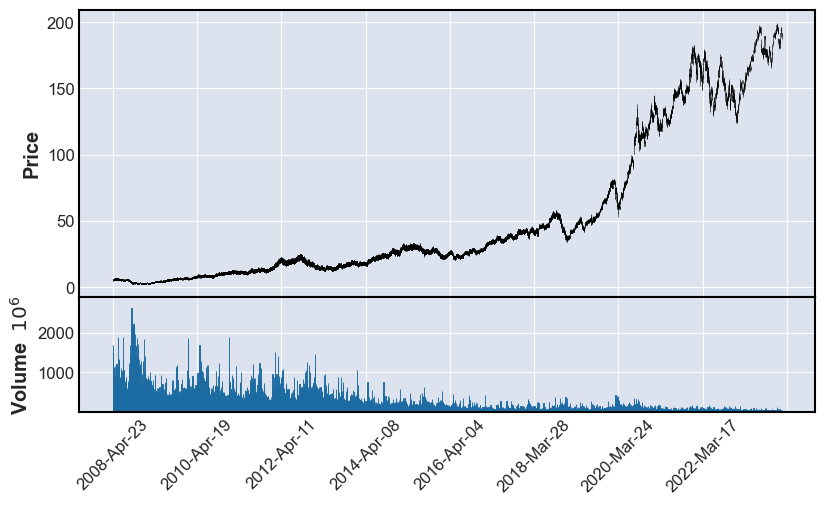

In [86]:
mpf.plot(sp_data, type='candle',volume=True, figratio=(16,9))

# Combine earnings and stock price data

In [31]:
price_earnings = pd.read_csv('Data/AAPL_price_earnings.csv')
    

In [32]:
price_earnings

,Date,Open,High,Low,Close,Volume,reportedEPS,estimatedEPS,surprise,surprisePercentage,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2/5/2024,188.149994,189.250000,185.839996,187.679993,69668800,2.02,1.93,0.09,4.6632,NaN,NaN,NaN,NaN,NaN,NaN
1,2/2/2024,179.860001,187.330002,179.250000,185.850006,102518000,2.02,1.93,0.09,4.6632,NaN,NaN,NaN,NaN,NaN,NaN
2,2/1/2024,183.990005,186.949997,183.820007,186.860001,64885400,2.02,1.93,0.09,4.6632,NaN,NaN,NaN,NaN,NaN,NaN
3,1/31/2024,187.039993,187.100006,184.350006,184.399994,55467800,1.46,1.39,0.07,5.0360,NaN,NaN,NaN,NaN,NaN,NaN
4,1/30/2024,190.940002,191.800003,187.470001,188.039993,55859400,1.46,1.39,0.07,5.0360,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,1/7/2005,1.160714,1.243393,1.156250,1.048247,2227450400,0,0.00,0.00,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
4801,1/6/2005,1.154821,1.159107,1.130893,0.977102,705555200,0,0.00,0.00,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
4802,1/5/2005,1.151071,1.165179,1.143750,0.976346,680433600,0,0.00,0.00,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
4803,1/4/2005,1.139107,1.169107,1.124464,0.967869,1096810400,0,0.00,0.00,0.0000,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
price_earnings.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'reportedEPS',
       'estimatedEPS', 'surprise', 'surprisePercentage', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15'],
      dtype='object')

In [38]:
price_earnings.pop('Unnamed: 12')
price_earnings.pop('Unnamed: 13')
price_earnings.pop('Unnamed: 14')
price_earnings.pop('Unnamed: 15')
price_earnings

,Date,Open,High,Low,Close,Volume,reportedEPS,estimatedEPS,surprise,surprisePercentage
0,2/5/2024,188.149994,189.250000,185.839996,187.679993,69668800,2.02,1.93,0.09,4.6632
1,2/2/2024,179.860001,187.330002,179.250000,185.850006,102518000,2.02,1.93,0.09,4.6632
2,2/1/2024,183.990005,186.949997,183.820007,186.860001,64885400,2.02,1.93,0.09,4.6632
3,1/31/2024,187.039993,187.100006,184.350006,184.399994,55467800,1.46,1.39,0.07,5.0360
4,1/30/2024,190.940002,191.800003,187.470001,188.039993,55859400,1.46,1.39,0.07,5.0360
...,...,...,...,...,...,...,...,...,...,...
4800,1/7/2005,1.160714,1.243393,1.156250,1.048247,2227450400,0,0.00,0.00,0.0000
4801,1/6/2005,1.154821,1.159107,1.130893,0.977102,705555200,0,0.00,0.00,0.0000
4802,1/5/2005,1.151071,1.165179,1.143750,0.976346,680433600,0,0.00,0.00,0.0000
4803,1/4/2005,1.139107,1.169107,1.124464,0.967869,1096810400,0,0.00,0.00,0.0000


In [40]:
price_earnings = price_earnings.to_csv('Data/AAPL_price_earnings.csv')

In [13]:
price_earnings = pd.read_csv('Data/AAPL_price_earnings.csv', index_col='Date')

In [14]:
price_earnings

,Unnamed: 0,Open,High,Low,Close,Volume,reportedEPS,estimatedEPS,surprise,surprisePercentage
Date,,,,,,,,,,
2/5/2024,0,188.149994,189.250000,185.839996,187.679993,69668800,2.02,1.93,0.09,4.6632
2/2/2024,1,179.860001,187.330002,179.250000,185.850006,102518000,2.02,1.93,0.09,4.6632
2/1/2024,2,183.990005,186.949997,183.820007,186.860001,64885400,2.02,1.93,0.09,4.6632
1/31/2024,3,187.039993,187.100006,184.350006,184.399994,55467800,1.46,1.39,0.07,5.0360
1/30/2024,4,190.940002,191.800003,187.470001,188.039993,55859400,1.46,1.39,0.07,5.0360
...,...,...,...,...,...,...,...,...,...,...
1/23/2007,4288,3.061786,3.125357,3.053929,2.594505,1207424400,0.04,0.03,0.01,33.3333
1/22/2007,4289,3.183571,3.184286,3.058929,2.627504,1454026000,0.04,0.03,0.01,33.3333
1/19/2007,4290,3.165357,3.201786,3.147143,2.679273,1364473600,0.04,0.03,0.01,33.3333


In [15]:
price_earnings.pop('Unnamed: 0')


Date
2/5/2024        0
2/2/2024        1
2/1/2024        2
1/31/2024       3
1/30/2024       4
             ... 
1/23/2007    4288
1/22/2007    4289
1/19/2007    4290
1/18/2007    4291
1/17/2007    4292
Name: Unnamed: 0, Length: 4293, dtype: int64

In [16]:
price_earnings

,Open,High,Low,Close,Volume,reportedEPS,estimatedEPS,surprise,surprisePercentage
Date,,,,,,,,,
2/5/2024,188.149994,189.250000,185.839996,187.679993,69668800,2.02,1.93,0.09,4.6632
2/2/2024,179.860001,187.330002,179.250000,185.850006,102518000,2.02,1.93,0.09,4.6632
2/1/2024,183.990005,186.949997,183.820007,186.860001,64885400,2.02,1.93,0.09,4.6632
1/31/2024,187.039993,187.100006,184.350006,184.399994,55467800,1.46,1.39,0.07,5.0360
1/30/2024,190.940002,191.800003,187.470001,188.039993,55859400,1.46,1.39,0.07,5.0360
...,...,...,...,...,...,...,...,...,...
1/23/2007,3.061786,3.125357,3.053929,2.594505,1207424400,0.04,0.03,0.01,33.3333
1/22/2007,3.183571,3.184286,3.058929,2.627504,1454026000,0.04,0.03,0.01,33.3333
1/19/2007,3.165357,3.201786,3.147143,2.679273,1364473600,0.04,0.03,0.01,33.3333


In [17]:
price_earnings['Tomorrow'] = price_earnings['Close'].shift(-1)
price_earnings

,Open,High,Low,Close,Volume,reportedEPS,estimatedEPS,surprise,surprisePercentage,Tomorrow
Date,,,,,,,,,,
2/5/2024,188.149994,189.250000,185.839996,187.679993,69668800,2.02,1.93,0.09,4.6632,185.850006
2/2/2024,179.860001,187.330002,179.250000,185.850006,102518000,2.02,1.93,0.09,4.6632,186.860001
2/1/2024,183.990005,186.949997,183.820007,186.860001,64885400,2.02,1.93,0.09,4.6632,184.399994
1/31/2024,187.039993,187.100006,184.350006,184.399994,55467800,1.46,1.39,0.07,5.0360,188.039993
1/30/2024,190.940002,191.800003,187.470001,188.039993,55859400,1.46,1.39,0.07,5.0360,191.729996
...,...,...,...,...,...,...,...,...,...,...
1/23/2007,3.061786,3.125357,3.053929,2.594505,1207424400,0.04,0.03,0.01,33.3333,2.627504
1/22/2007,3.183571,3.184286,3.058929,2.627504,1454026000,0.04,0.03,0.01,33.3333,2.679273
1/19/2007,3.165357,3.201786,3.147143,2.679273,1364473600,0.04,0.03,0.01,33.3333,2.696529


In [18]:
price_earnings['Target'] = (price_earnings['Tomorrow'] > price_earnings['Close']).astype(int)
price_earnings

,Open,High,Low,Close,Volume,reportedEPS,estimatedEPS,surprise,surprisePercentage,Tomorrow,Target
Date,,,,,,,,,,,
2/5/2024,188.149994,189.250000,185.839996,187.679993,69668800,2.02,1.93,0.09,4.6632,185.850006,0
2/2/2024,179.860001,187.330002,179.250000,185.850006,102518000,2.02,1.93,0.09,4.6632,186.860001,1
2/1/2024,183.990005,186.949997,183.820007,186.860001,64885400,2.02,1.93,0.09,4.6632,184.399994,0
1/31/2024,187.039993,187.100006,184.350006,184.399994,55467800,1.46,1.39,0.07,5.0360,188.039993,1
1/30/2024,190.940002,191.800003,187.470001,188.039993,55859400,1.46,1.39,0.07,5.0360,191.729996,1
...,...,...,...,...,...,...,...,...,...,...,...
1/23/2007,3.061786,3.125357,3.053929,2.594505,1207424400,0.04,0.03,0.01,33.3333,2.627504,1
1/22/2007,3.183571,3.184286,3.058929,2.627504,1454026000,0.04,0.03,0.01,33.3333,2.679273,1
1/19/2007,3.165357,3.201786,3.147143,2.679273,1364473600,0.04,0.03,0.01,33.3333,2.696529,1


In [24]:
price_earnings['reportedEPS'] = pd.to_numeric(price_earnings['reportedEPS'], errors='coerce')
price_earnings['Open'] = price_earnings['Open'].astype('float16')
price_earnings['High'] = price_earnings['High'].astype('float16')
price_earnings['Low'] = price_earnings['Low'].astype('float16')
price_earnings['Close'] = price_earnings['Close'].astype('float16')
price_earnings['Volume'] = price_earnings['Volume'].astype('int16')
price_earnings['estimatedEPS'] = price_earnings['estimatedEPS'].astype('float16')
price_earnings['surprise'] = price_earnings['surprise'].astype('float16')
price_earnings['surprisePercentage'] = price_earnings['surprisePercentage'].astype('float16')
price_earnings['Tomorrow'] = price_earnings['Tomorrow'].astype('float16')
price_earnings['Target'] = price_earnings['Target'].astype('int8')

In [25]:
price_earnings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4293 entries, 2/5/2024 to 1/17/2007
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                4293 non-null   float16
 1   High                4293 non-null   float16
 2   Low                 4293 non-null   float16
 3   Close               4293 non-null   float16
 4   Volume              4293 non-null   int16  
 5   reportedEPS         0 non-null      float64
 6   estimatedEPS        4293 non-null   float16
 7   surprise            4293 non-null   float16
 8   surprisePercentage  4293 non-null   float16
 9   Tomorrow            4292 non-null   float16
 10  Target              4293 non-null   int8   
dtypes: float16(8), float64(1), int16(1), int8(1)
memory usage: 275.8+ KB


In [27]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = price_earnings.iloc[:-500]
test = price_earnings.iloc[-500:]

predictors = ['Open', 'High', 'Low', 'Close', 'Volume']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [28]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [29]:
precision_score(test['Target'], preds)

0.6153846153846154

In [30]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [31]:
def backtest(data, model, predictors, start=1250, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions) 

In [32]:
predictions = backtest(price_earnings, model, predictors)

In [33]:
predictions['Predictions'].value_counts()

Predictions
0    1671
1    1372
Name: count, dtype: int64

In [34]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5021865889212828

In [35]:
predictions['Target'].value_counts() / predictions.shape[0]

Target
0    0.530069
1    0.469931
Name: count, dtype: float64

In [36]:
horizons = [2,5,21,63, 126] # of trading days
new_predictors = []

for horizon in horizons:
    rolling_averages = price_earnings.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    price_earnings[ratio_column] = price_earnings['Close'] / rolling_averages['Close']
    
    trend_column = f"Trend{horizon}"
    price_earnings[trend_column] = price_earnings.shift(1).rolling(horizon).sum()['Target']
    
    new_predictors += [ratio_column, trend_column]

In [37]:
#Modified model parameters
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [38]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1] #returns 0 or 1 @ 50%
    preds[preds >= .6] = 1 #raising threshold to 60%
    preds[preds <= .6] = 0
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [39]:
predictions = backtest(price_earnings, model, new_predictors)

In [40]:
#Predict price going up (1) or down (0) based on 60% threshold
predictions['Predictions'].value_counts()

Predictions
0.0    2880
1.0     163
Name: count, dtype: int64

In [41]:
precision_score(predictions['Target'], predictions['Predictions'])

0.6012269938650306